In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

In [3]:
#retrieve and format data - into labels from the dataset
def labels(filename):
    data = pd.read_csv(filename)
    data_y = data['LABEL']
    data_y-= 1
    return data_y

In [4]:
with open("../archive/ProcessData.npy", 'rb') as f:
        training_data_x = np.load(f)
        testing_data_x = np.load(f)
        
training_data_y = labels("../archive/exoTrain.csv")
testing_data_y = labels("../archive/exoTest.csv")

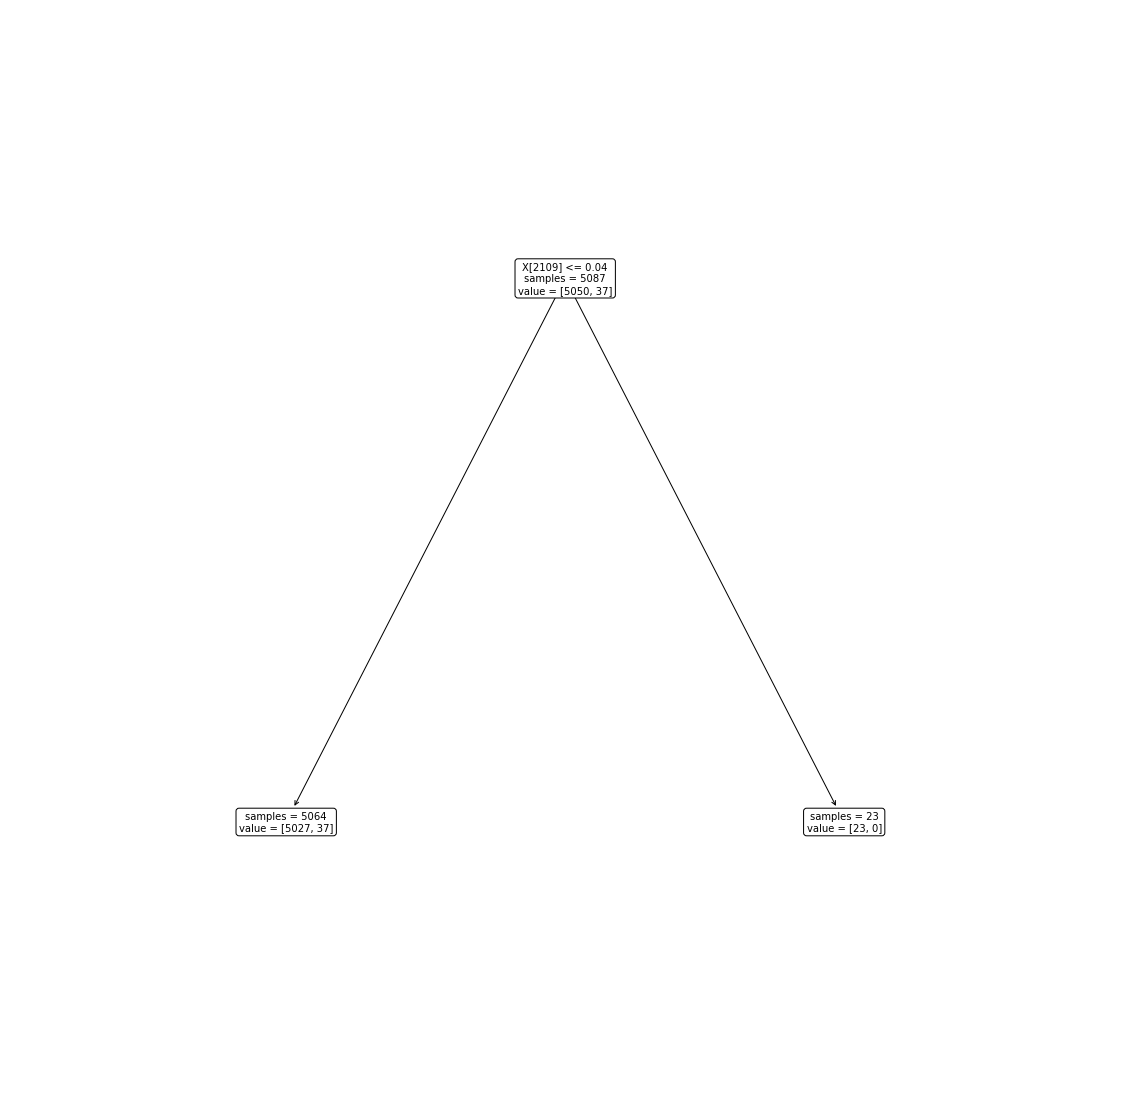

Accuracy percentage:  99.12280701754386 %


In [5]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

In [6]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [7]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

Accuracy percentage:  99.12280701754386 %


In [8]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)